In [ ]:
# GRIP- April2022
# The Spark Foundation-Data science & Business Analytics Intern
# Aauthor - Sumyuktha.k
# Email: atturu05@gmail.com
# Task 2 :Prediction Using Unsupervised ML(Level Beginner)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# load the iris dataset
df = pd.read_csv('G:\dataset\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
# Getting some more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Getting statistical insights
df.describe(include ='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
# checking for duplicate values
df.duplicated().sum()

3

In [7]:
# This shows the actual duplicate rows
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
# checking for missing value
df.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

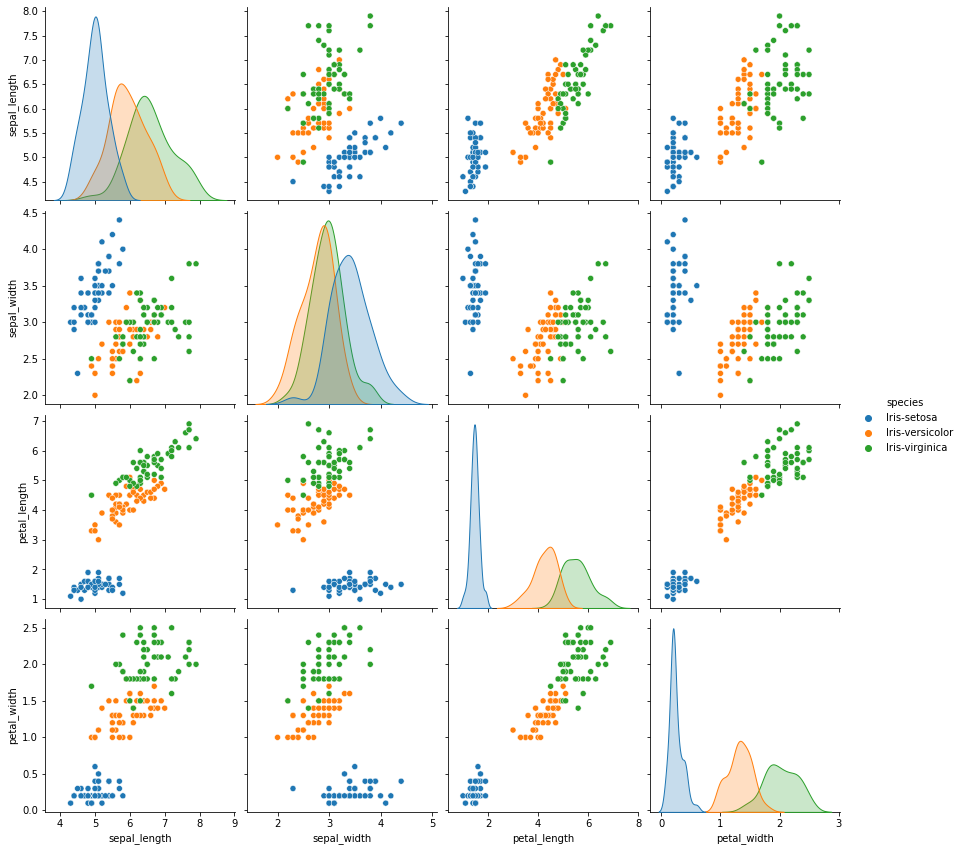

In [9]:
sns.pairplot(df,hue='species', height=3);

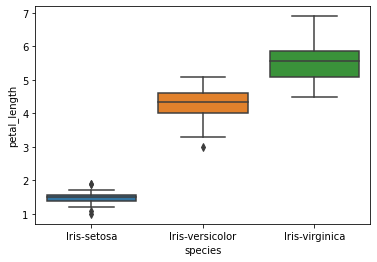

In [10]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

# K-Means clustering

In [11]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [12]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

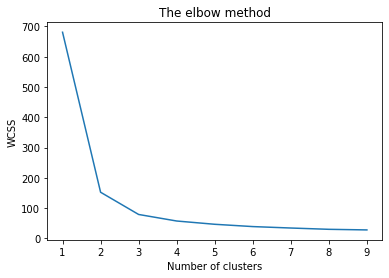

In [13]:
# using elbow method to determine the optimal no of clusters for k means clustering
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Implementing K means cluster model

In [ ]:
# Lets use the concept of inertia which is the sum of the squared distances of samples to their closest cluster center.
# If the value of K is huge, then the no.of points within a cluster will be less.
# 'The Elbow method' allows us to pick the optimum no. of clusters for classification.
# so,K=3 we have obtained an optimal distortion/inertia with which we can segment the data into 3 diff clusters.

In [14]:
# Applying the kmeans to the dataset
kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
y_kmeans = kmeans.fit_predict(x)
# to display cluster centers
print(kmeans.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


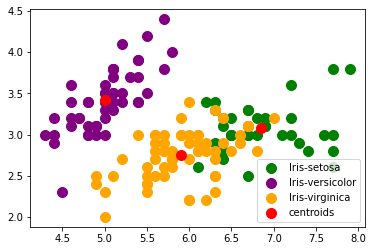

In [15]:
# plotting the clusters
plt.scatter(x[y_kmeans ==0,0], x[y_kmeans ==0,1], s=100, c='green', label='Iris-setosa')
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans ==1,1], s=100, c='purple', label='Iris-versicolor')
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans ==2,1], s=100, c='orange', label='Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='red', label='centroids')
plt.legend()
plt.show()

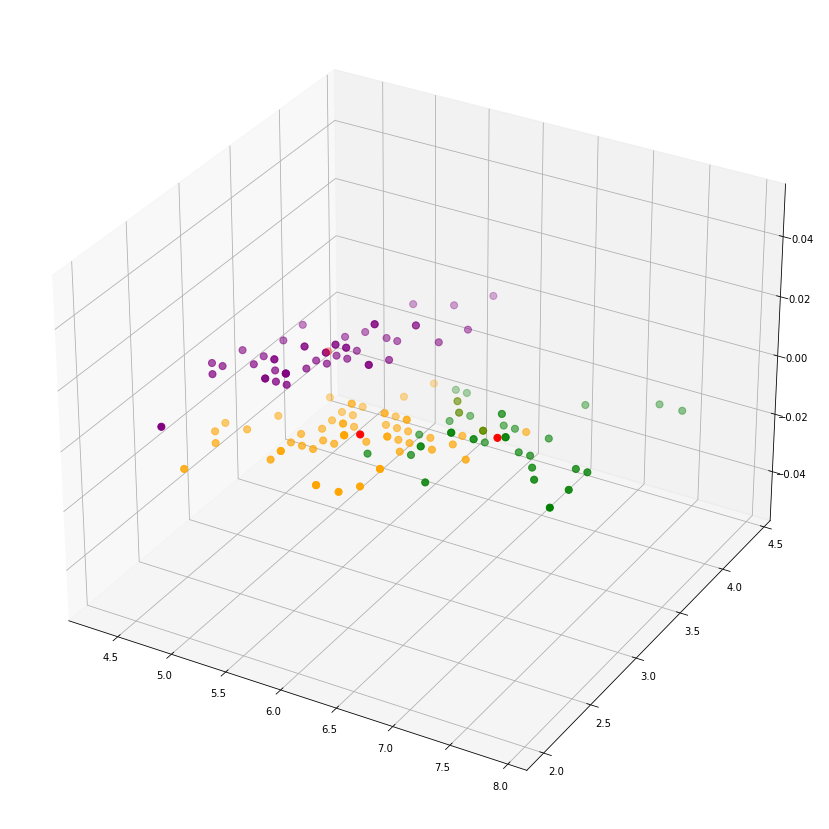

In [16]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')

plt.scatter(x[y_kmeans ==0,0], x[y_kmeans ==0,1], s=50, c='green', label='Iris-setosa')
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans ==1,1], s=50, c='purple', label='Iris-versicolor')
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans ==2,1], s=50, c='orange', label='Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=50, c='red', label='centroids')

plt.show()

In [17]:
# Applying the predictions to thr iris dataset
Data_with_clusters = df.copy()
Data_with_clusters['cluster'] = y_kmeans
print(Data_with_clusters.head(5))


   sepal_length  sepal_width  petal_length  petal_width      species  cluster
0           5.1          3.5           1.4          0.2  Iris-setosa        1
1           4.9          3.0           1.4          0.2  Iris-setosa        1
2           4.7          3.2           1.3          0.2  Iris-setosa        1
3           4.6          3.1           1.5          0.2  Iris-setosa        1
4           5.0          3.6           1.4          0.2  Iris-setosa        1


In [18]:
# printing the tail of the data with clusters
print(Data_with_clusters.tail(5))

     sepal_length  sepal_width  petal_length  petal_width         species  \
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     cluster  
145        0  
146        2  
147        0  
148        0  
149        2  


# conclusion

In [ ]:
# 1.The goal of the k-means clustering algorithm is to find groups in the data.
# 2.An insight we can get from the scatterplot is the model's accuracy in determining setosa and 
#   virginica is comparatively more close to Versicolour.
#3.From the table we can see most of the observations have been clustered.